In [223]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,RobustScaler, StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
#Leitura dos datasets de treino e teste e criação do df de resposta
df_train = pd.read_csv('../TEST_FILES/train.csv')
df_test = pd.read_csv('../TEST_FILES/test.csv')
df_resposta = pd.DataFrame()

In [225]:
#verificar se os dados de teste estão nos dados de treinamento
print(set(df_test.columns).issubset(set(df_train.columns)))

True


In [226]:
colunas = [
    'CO_UF_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'TP_DEPENDENCIA_ADM_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_SABATISTA',
    'IN_GESTANTE',
    'IN_IDOSO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q027',
    'Q047'
]
colunas_corr = [
    'NU_NOTA_MT',
    'CO_UF_RESIDENCIA',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_NACIONALIDADE',
    'TP_ST_CONCLUSAO',
    'TP_ANO_CONCLUIU',
    'TP_ESCOLA',
    'TP_ENSINO',
    'IN_TREINEIRO',
    'TP_DEPENDENCIA_ADM_ESC',
    'IN_BAIXA_VISAO',
    'IN_CEGUEIRA',
    'IN_SURDEZ',
    'IN_DISLEXIA',
    'IN_DISCALCULIA',
    'IN_SABATISTA',
    'IN_GESTANTE',
    'IN_IDOSO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'TP_LINGUA',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q024',
    'Q025',
    'Q026',
    'Q027',
    'Q047'
]

In [227]:
# Correlação das tabelas
# Quanto mais próximo de 1, maior a correlação
df_train.corr()['NU_NOTA_MT'].dropna().sort_values(ascending=False)

NU_NOTA_MT         1.000000
NU_NOTA_CN         0.584941
NU_NOTA_CH         0.529594
NU_NOTA_LC         0.494695
NU_NOTA_REDACAO    0.379376
                     ...   
Q036              -0.145501
TP_COR_RACA       -0.157364
TP_LINGUA         -0.201726
Q038              -0.202259
Q037              -0.265249
Name: NU_NOTA_MT, Length: 78, dtype: float64

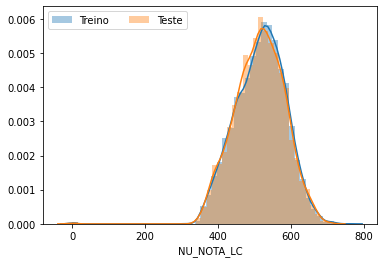

In [228]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')

In [229]:
df_train =  df_train.fillna(0)

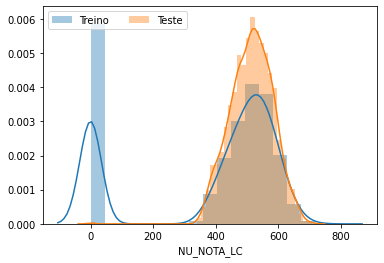

In [230]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Treino','Teste'], ncol=2, loc='upper left')


In [231]:
df_test = df_test.fillna(0)


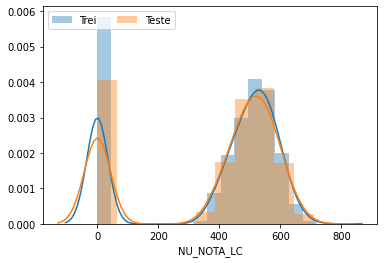

In [232]:
x0 = df_train['NU_NOTA_LC']
x1 = df_test['NU_NOTA_LC']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['Trei','Teste'], ncol=2, loc='upper left')

In [233]:
trainColunasTipoObjeto = df_train.select_dtypes(include=[object]).columns
testColunasTipoObjeto = df_test.select_dtypes(include=[object]).columns


In [234]:
yTrain = df_train['NU_NOTA_MT']
xTrain = df_train[colunas]
xTest = df_test[colunas]

In [235]:
yTrainEncoder = LabelEncoder().fit_transform(yTrain)

for coluna in trainColunasTipoObjeto:
    if coluna in colunas and colunas != 'NU_INSCRICAO':
        xTrain[coluna] = LabelEncoder().fit_transform(xTrain[coluna].astype(str))
        
for coluna in testColunasTipoObjeto:
    if coluna in colunas and coluna != 'NU_INSCRICAO':
        xTest[coluna] = LabelEncoder().fit_transform(xTest[coluna].astype(str))
        

<ipython-input-235-c7834c6bc9a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTrain[coluna] = LabelEncoder().fit_transform(xTrain[coluna].astype(str))
<ipython-input-235-c7834c6bc9a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest[coluna] = LabelEncoder().fit_transform(xTest[coluna].astype(str))


In [236]:
sc = StandardScaler()
rb = StandardScaler()

xTrainScaler = sc.fit_transform(xTrain)
xTestScaler = sc.transform(xTest)

In [237]:
ada = AdaBoostRegressor()

clf = Pipeline([('scaler',sc),('ada',ada)])

random_grid = {
    'ada__base_estimator':[DecisionTreeRegressor(max_depth=8), DecisionTreeRegressor(max_depth=3)],
    'ada__random_state':[0,42],
    'ada__loss':['linear','square','exponential'],
    'ada__n_estimators':[10,20,50,100,200]
}

search = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,
                            n_iter=20,cv=5,verbose=10, n_jobs = -1)

results = search.fit(xTrain,yTrain)

results.best_score_,results.best_params_,results.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


(0.923344547928639,
 {'ada__random_state': 0,
  'ada__n_estimators': 10,
  'ada__loss': 'exponential',
  'ada__base_estimator': DecisionTreeRegressor(max_depth=8)},
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('ada',
                  AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                                    loss='exponential', n_estimators=10,
                                    random_state=0))]))

In [238]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor
                            (ccp_alpha=0.0,
                             criterion='mse',
                             max_depth=8,
                             max_features=None,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             presort='deprecated',
                             random_state=None,
                             splitter='best'),
                        learning_rate=1.0, loss='exponential', n_estimators=10, random_state=0)

ada.fit(xTrainScaler,yTrainEncoder)
yPredTest = ada.predict(xTestScaler)
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = df_test.NU_INSCRICAO
answer['NU_NOTA_MT'] = yPredTest
answer.to_csv('answer.csv',index=False)